## Import Library

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ridge/Lasso Regression
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV

# PCA
from sklearn.decomposition import PCA

# KNN_Classifier & Regressor
from sklearn.neighbors import KNeighborsClassifier  # Hanya mencoba
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import learning_curve

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# SVM Regressor
from sklearn.svm import SVR

# Gradient Boosting
from xgboost import XGBRegressor

# Neural Networks
from sklearn.neural_network import MLPRegressor

# Logistic regression  # Hanya mencoba
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Gathering Data

In [2]:
df = pd.read_csv('data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Assessing Data & Cleaning Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Sepertinya data sudah terlihat rapi dan tinggal di eksekusi saja

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
total_duplicated = df.duplicated().sum()
if total_duplicated != 0:
    print(f'Total Duplicated: {total_duplicated}')

Total Duplicated: 240


In [6]:
df.drop_duplicates(inplace=True)
total_duplicated = df.duplicated().sum()
if total_duplicated != 0:
    print(f'Total Duplicated: {total_duplicated}')
else:
    print('Data sudah aman')

Data sudah aman


## Explore in ML

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
numeric_data = df.select_dtypes(include=[np.number])

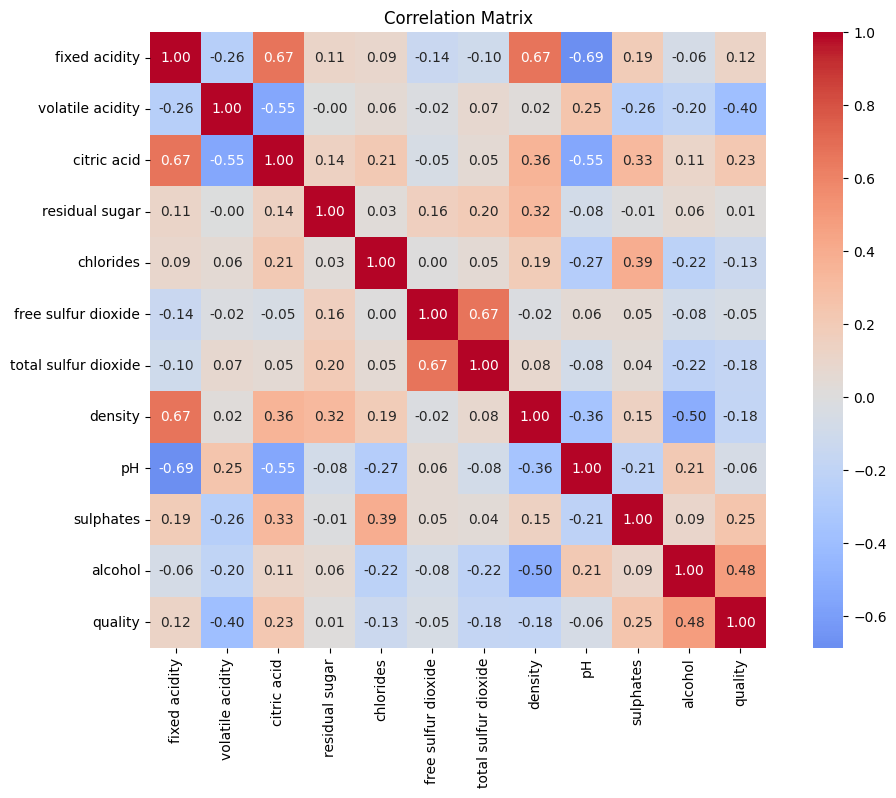

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, center=0)
plt.title('Correlation Matrix')
plt.show()

In [10]:
correlation_target = abs(correlation_matrix['quality'])
selected_features = correlation_target[correlation_target > 0.1].index
print("Selected features based on correlation:", selected_features)

Selected features based on correlation: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [11]:
X = df.drop(columns=['quality'])
y = df['quality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [14]:
lr_models = LinearRegression()
lr_models.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr_models.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE: {}".format(mse))

Linear Regression MSE: 0.4310090050900972


## Ridge / Lasso Regression

In [17]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge**0.5


print(f"Ridge Regression MSE: {mse_ridge:.3f}")
print(f"RMSE (Testing): {rmse_ridge:.3f}")
print("Koefisien : \n{}".format(ridge_model.coef_))

Ridge Regression MSE: 0.431
RMSE (Testing): 0.656
Koefisien : 
[-0.04775612 -0.17829659 -0.01895654 -0.00470257 -0.1157056   0.0484729
 -0.12330571  0.04020223 -0.12030604  0.14854726  0.33266468]


In [18]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso**0.5

print(f"Lasso Regression MSE: {mse_lasso:.3f}")
print(f"RMSE (Testing): {rmse_lasso:.3f}")
print("Koefisien : \n{}".format(lasso_model.coef_))

Lasso Regression MSE: 0.466
RMSE (Testing): 0.683
Koefisien : 
[ 0.         -0.14646387  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.02918417  0.25546156]


## KNN

In [19]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Regression MSE: {mse_knn}")

KNN Regression MSE: 0.5082352941176471


## Tuning Hyperparams

### Ridge

In [20]:
list_alpha = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.75, 0.9, 0.99]
model_ridge_cv = RidgeCV(alphas=list_alpha, cv=5)
model_ridge_cv.fit(X_train, y_train)
y_pred_ridge_cv = model_ridge_cv.predict(X_test)
rmse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)**0.5
print("alpha:", model_ridge_cv.alpha_)
print(f"RMSE (Testing): {rmse_ridge_cv:.3f}")
print("Koefisien:")
print(model_ridge_cv.coef_)

alpha: 0.99
RMSE (Testing): 0.656
Koefisien:
[-0.04777499 -0.17829855 -0.01895847 -0.00470777 -0.11570822  0.04847538
 -0.12330862  0.04022057 -0.12031829  0.1485468   0.33267757]


### Lasso

In [21]:
list_alpha = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.75, 0.9, 0.99]
model_lasso_cv = LassoCV(alphas=list_alpha, cv=5)
model_lasso_cv.fit(X_train, y_train)
y_pred_lasso_cv = model_lasso_cv.predict(X_test)
rmse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)**0.5
print("alpha:", model_lasso_cv.alpha_)
print(f"RMSE (Testing): {rmse_lasso_cv:.3f}")
print("Koefisien:")
print(model_lasso_cv.coef_)

alpha: 0.01
RMSE (Testing): 0.652
Koefisien:
[ 0.         -0.17039621 -0.          0.         -0.095767    0.01857307
 -0.0901374  -0.         -0.07087634  0.13675521  0.30507253]


## Melakukan PCA

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

print(f'PCA (2 Component): \n{X_pca[:5]}')

PCA (2 Component): 
[[ 0.14456252 -2.05559191]
 [-1.58854398  0.2694847 ]
 [-1.51026703  0.31910018]
 [-1.06554902  0.26051448]
 [-0.74968674  0.62138212]]


In [23]:
explained_variance = pca.explained_variance_ratio_
print(f"Variansi yang dijelaskan oleh setiap komponen: {explained_variance}")

print(f"Total variansi yang dijelaskan: {explained_variance.sum()}")

Variansi yang dijelaskan oleh setiap komponen: [0.2842563  0.17408936]
Total variansi yang dijelaskan: 0.45834566568231994


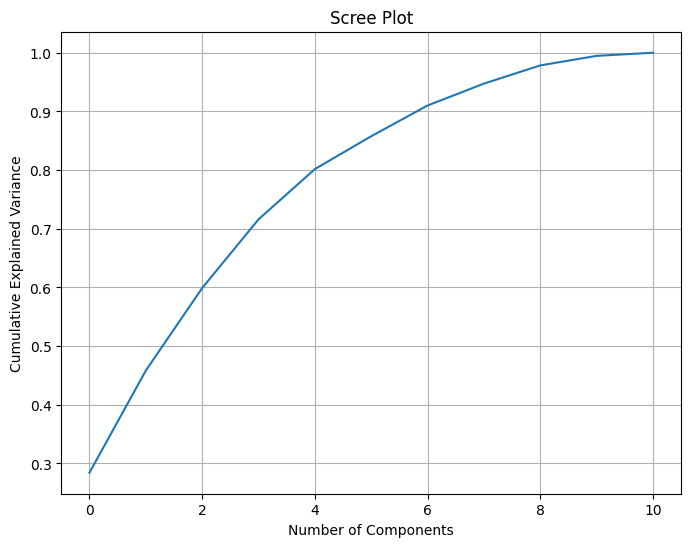

In [24]:
pca_full = PCA()
pca_full.fit(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [25]:
print(f"Shape of X: {X_pca.shape}")
print(f"Shape of y: {y_train.shape}")

Shape of X: (1087, 2)
Shape of y: (1087,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_train, test_size=0.3, random_state=42)

## Test dengan KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
accuracy = knn.score(X_test, y_test)
print(f"Akurasi setelah PCA: {accuracy}")

Akurasi setelah PCA: 0.4801223241590214


In [31]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Regression MSE: {mse_knn}")

KNN Regression MSE: 0.6611620795107034


Akurasinya lebih tinggi dibandingkan yang sebelumnya. Akan tetapi belum memenuhi akurasi yang ideal

## Random Forest

In [50]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 0.710948623853211


## SVM

In [49]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVM Regression MSE: {mse_svr}")

SVM Regression MSE: 0.6041582752428993


## Gradient Boosting

In [39]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Regression MSE: {mse_xgb}")

XGBoost Regression MSE: 0.701341522784185


## Neural Networks (MLP)

In [42]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"Neural Network Regression MSE: {mse_mlp}")

Neural Network Regression MSE: 0.5878704972063309


## Logistic Regression

In [45]:
y_train_class = (y_train > 5).astype(int)
y_test_class = (y_test > 5).astype(int)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train_class)
y_pred_class = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.6605504587155964


## Summary

Setelah dicoba menggunakan berbagai algoritma, maka dapat dilihat bahwa MAE yang tertinggi adalah Random Forest Reggresor. Maka, untuk wine_quality ini akan digunakan Random Forest Regressor.